In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
pwd

u'/fs/nas14/other0/cbenitez/Notebooks'

In [3]:
cd

/home/cbenitez


In [4]:
def vgalac2vcart(coord_galac,vel_galac):
    vvT = vel_galac.T
    ccT = coord_galac.T
    v_X = -vvT[0]*np.cos(ccT[2])*np.cos(ccT[1]) + vvT[1]*np.sin(ccT[1]) + vvT[2]*np.sin(ccT[2])*np.cos(ccT[1])
    v_Y = -vvT[0]*np.cos(ccT[2])*np.sin(ccT[1]) - vvT[1]*np.cos(ccT[1]) + vvT[2]*np.sin(ccT[2])*np.sin(ccT[1])
    v_Z = vvT[0]*np.sin(ccT[2]) + vvT[2]*np.cos(ccT[2])
    return np.array([v_X, v_Y, v_Z])

In [5]:
def cgalac2ccart(coord_galac):
    ccT = coord_galac.T
    XX = R0 - ccT[0]*np.cos(ccT[1])*np.cos(ccT[2])
    YY =    - ccT[0]*np.sin(ccT[1])*np.cos(ccT[2])
    ZZ =      ccT[0]*np.sin(ccT[2])
    return np.array([XX, YY, ZZ])

In [6]:
R0 = 8.0
A,B = 13.55037486116183, -13.938877070529985

In [7]:
auxtt2 = np.linspace(-np.pi,np.pi,200)
auxtt = np.linspace(np.pi/4,-np.pi/2,500)

In [8]:
evols_r = np.load('evols_oc_var1.npy')
oocc_checked = np.load('evols_oc_var1_cons.npy')

In [9]:
A,B = 13.55037486116183, -13.938877070529985
rc = .4
#omega_0 = -8.90866151e-16*60*60*24*365*1e6
#omega_0 = (B-A)/1000
omega_0 = -np.linalg.norm(mt.vel_circ([8.,0.,0.],mt.force_T))*mt.C.kpc.express(mt.C.km)/8/1000

In [10]:
np.shape(evols_r[0]),np.shape(evols_r[1])

((11, 6), (68, 11, 100, 6))

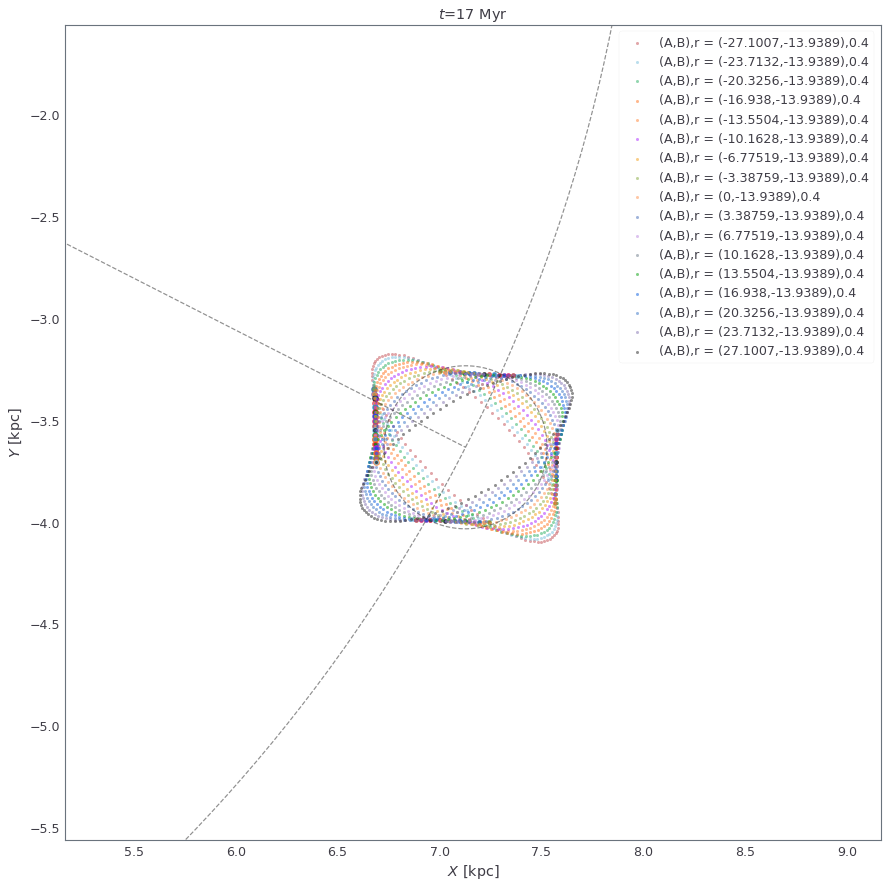

In [135]:
tc_index = 10
oc_index = 3
evols = np.array(evols_r[1])
lsrs = np.array(evols_r[0])
Dt = 0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6
plt.figure(figsize=(15,15))
for oc_index in range(17*0,17*1):
    oo = oocc_checked[oc_index]

    plt.scatter(evols[oc_index][tc_index][0,0],evols[oc_index][tc_index][0,1],alpha=1,s=40)
    plt.scatter(evols[oc_index][tc_index][0:-1:25,0],evols[oc_index][tc_index][0:-1:25,1],alpha=1,s=20)    
    plt.scatter(evols[oc_index][tc_index][:,0],evols[oc_index][tc_index][:,1],alpha=.5,s=8,label="(A,B),r = (%g,%g),%g"%(oo[0],oo[1],rc))
plt.plot([0,lsrs[tc_index][0]],[0,lsrs[tc_index][1]],ls="--",c='k',alpha=.5)
plt.plot(R0*np.cos(auxtt),R0*np.sin(auxtt),ls="--",c='k',alpha=.5)
plt.plot(rc*np.cos(auxtt2)+lsrs[tc_index][0],rc*np.sin(auxtt2)+lsrs[tc_index][1],ls="--",c='k',alpha=.5)
plt.xlim(R0*np.cos(omega_0*Dt*tc_index)-5*rc,R0*np.cos(omega_0*Dt*tc_index)+5*rc)
plt.ylim(R0*np.sin(omega_0*Dt*tc_index)-5*rc,R0*np.sin(omega_0*Dt*tc_index)+5*rc)
plt.xlabel("$X$ [kpc]")
plt.ylabel("$Y$ [kpc]")
plt.title("$t$=%.2g Myr"%(tc_index*Dt))
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

In [151]:
OCrrtt = []
for rc in range(4):
    OCtt = []
    for j in range(11):
        OCtt.append(oc.fit_OC(evols_r[1][rc][j],evols_r[0][j],Nsteps=800, Nwalkers=50))
    OCrrtt.append(OCtt)

100%|██████████| 800/800 [00:13<00:00, 62.31it/s]

[A, B, C, D]: [13.49952479443717, -13.896222766408481, 0.029519562397407897, -0.035154813896210904]



100%|██████████| 800/800 [00:13<00:00, 58.75it/s]

[A, B, C, D]: [13.463944774266762, -13.891098085806348, 0.04368400095804274, -0.04106049192407352]



100%|██████████| 800/800 [00:13<00:00, 57.72it/s]

[A, B, C, D]: [13.51404552097549, -13.876682263727341, 0.025257528827640263, -0.04280952941507679]



100%|██████████| 800/800 [00:13<00:00, 59.62it/s]


[A, B, C, D]: [13.485015525244018, -13.901397165162045, 0.024516404116156763, -0.002678230242704971]


100%|██████████| 800/800 [00:13<00:00, 58.30it/s]

[A, B, C, D]: [13.522552942899111, -13.903337235095075, 0.015685581387974837, -0.016882675255470506]



100%|██████████| 800/800 [00:13<00:00, 59.40it/s]

[A, B, C, D]: [13.502017935010993, -13.923282857512852, 0.003759673936693589, -0.015351169371860443]



100%|██████████| 800/800 [00:13<00:00, 59.39it/s]


[A, B, C, D]: [13.529152509880566, -13.890668148755768, -0.005122036212500458, -0.04357343168079916]


100%|██████████| 800/800 [00:13<00:00, 58.73it/s]

[A, B, C, D]: [13.508847236809764, -13.89382013287257, 0.01370856174804888, -0.0019415363966444193]



100%|██████████| 800/800 [00:13<00:00, 58.52it/s]

[A, B, C, D]: [13.487439046744214, -13.894713463144742, 0.02771018120972772, 0.0067046939428081]



100%|██████████| 800/800 [00:13<00:00, 58.10it/s]

[A, B, C, D]: [13.460702469109123, -13.903639617721366, 0.008252009941976848, 0.03170109051784489]



100%|██████████| 800/800 [00:13<00:00, 63.87it/s]

[A, B, C, D]: [13.493665380906679, -13.886845360192687, 0.00832626998176933, 0.02078158308398409]



100%|██████████| 800/800 [00:12<00:00, 63.60it/s]

[A, B, C, D]: [13.517606115574017, -13.909561742946826, 0.009819204199153104, -0.014181445475227995]



100%|██████████| 800/800 [00:12<00:00, 61.92it/s]

[A, B, C, D]: [13.518699429781467, -13.915559478063297, 0.009924854279798008, -0.021516390786396]



100%|██████████| 800/800 [00:12<00:00, 61.70it/s]

[A, B, C, D]: [13.518461866689044, -13.9230402630212, 0.008715051149131611, -0.011248398678643738]



100%|██████████| 800/800 [00:13<00:00, 58.96it/s]


[A, B, C, D]: [13.523975163143094, -13.91264423404346, -0.0006187087616751907, -0.014987543804093978]


100%|██████████| 800/800 [00:13<00:00, 61.21it/s]

[A, B, C, D]: [13.536463050154012, -13.919611705766982, 0.009285662018032728, -0.014317147876257943]



100%|██████████| 800/800 [00:13<00:00, 61.00it/s]

[A, B, C, D]: [13.519869345267644, -13.924959283600627, 0.008872497612585961, 0.005479456007430369]



100%|██████████| 800/800 [00:13<00:00, 61.50it/s]

[A, B, C, D]: [13.506827077443441, -13.92071710095694, 0.03179756622697423, -0.004497387933411666]



100%|██████████| 800/800 [00:13<00:00, 60.98it/s]

[A, B, C, D]: [13.509883585087575, -13.921981156054137, 0.017522838664307178, 0.00473566350564579]



100%|██████████| 800/800 [00:13<00:00, 61.45it/s]

[A, B, C, D]: [13.509629360140853, -13.909604416212893, 0.021040202069762204, 0.007657617095849799]



100%|██████████| 800/800 [00:13<00:00, 60.99it/s]

[A, B, C, D]: [13.52198027533306, -13.92762291134219, 0.020492051334673536, 0.015362802935119841]



100%|██████████| 800/800 [00:13<00:00, 60.98it/s]

[A, B, C, D]: [13.5131340256546, -13.913505224107658, 0.028022145162699186, 0.014268913804217472]



100%|██████████| 800/800 [00:13<00:00, 61.44it/s]

[A, B, C, D]: [13.530386714299436, -13.933682101377865, 0.012265371992348229, -0.008120979984880344]



100%|██████████| 800/800 [00:13<00:00, 60.43it/s]


[A, B, C, D]: [13.524054869885575, -13.934428914446864, 0.0015542730693210733, -0.009462348996652395]


100%|██████████| 800/800 [00:13<00:00, 60.51it/s]

[A, B, C, D]: [13.533805804975676, -13.930021642326004, 0.007404953738806992, -0.01512824890374296]



100%|██████████| 800/800 [00:13<00:00, 60.99it/s]


[A, B, C, D]: [13.531263310454648, -13.924900645239225, 0.01201018580256391, -0.0033636316984719666]


100%|██████████| 800/800 [00:13<00:00, 60.64it/s]


[A, B, C, D]: [13.5250567617415, -13.915162800930828, -0.001868388386670819, 0.0008106833020464221]


100%|██████████| 800/800 [00:13<00:00, 60.77it/s]

[A, B, C, D]: [13.52022730117689, -13.93605259971805, 0.010565728571225959, -0.0073415732427743775]



100%|██████████| 800/800 [00:13<00:00, 61.22it/s]

[A, B, C, D]: [13.507977519805447, -13.91564664062339, -0.001499652046457585, 0.02337861864352086]



100%|██████████| 800/800 [00:13<00:00, 61.46it/s]

[A, B, C, D]: [13.506985958371889, -13.914052930275668, 0.014923547801804576, 0.013968179563006063]



100%|██████████| 800/800 [00:12<00:00, 61.92it/s]

[A, B, C, D]: [13.510757094100791, -13.915268287200558, 0.01037698048953059, 0.01886155810336862]



100%|██████████| 800/800 [00:13<00:00, 61.22it/s]


[A, B, C, D]: [13.503240574393939, -13.937872246354903, 0.011167533689619806, 0.017779170819609155]


100%|██████████| 800/800 [00:13<00:00, 61.23it/s]

[A, B, C, D]: [13.504829809737604, -13.929809248095864, 0.022205188040422347, 0.037007215907592775]



100%|██████████| 800/800 [00:13<00:00, 61.46it/s]

[A, B, C, D]: [13.543429936951336, -13.935569160015115, 0.007161570855470811, -0.00603899671678388]



100%|██████████| 800/800 [00:12<00:00, 61.70it/s]


[A, B, C, D]: [13.54006942516498, -13.934791379486775, -0.0033744764899390697, -0.007169181764392529]


100%|██████████| 800/800 [00:12<00:00, 61.69it/s]

[A, B, C, D]: [13.522660823537423, -13.92767277936701, -0.013691662314989764, 0.00324356802122008]



100%|██████████| 800/800 [00:13<00:00, 61.45it/s]


[A, B, C, D]: [13.514533243401651, -13.923698434712145, -0.02208621137702757, -0.0012061345122772182]


100%|██████████| 800/800 [00:12<00:00, 61.93it/s]

[A, B, C, D]: [13.508746408209815, -13.92863013878413, -0.030577350979438367, -0.0008766478883243164]



100%|██████████| 800/800 [00:13<00:00, 60.29it/s]

[A, B, C, D]: [13.50197367964146, -13.914426431049439, -0.05375448260456232, 0.0008495970121713096]



100%|██████████| 800/800 [00:13<00:00, 60.98it/s]

[A, B, C, D]: [13.479953610988582, -13.90688480759345, -0.06368474982150343, 0.03568709869481394]



100%|██████████| 800/800 [00:13<00:00, 61.45it/s]


[A, B, C, D]: [13.459537918606685, -13.908097810340355, -0.06507856250496541, 0.04995815696562696]


100%|██████████| 800/800 [00:13<00:00, 61.21it/s]

[A, B, C, D]: [13.42722679959586, -13.905245380001862, -0.07244255253774269, 0.056345975081052685]



100%|██████████| 800/800 [00:13<00:00, 60.53it/s]

[A, B, C, D]: [13.427154561171744, -13.906930548523828, -0.09013116988031326, 0.06927089752859439]



100%|██████████| 800/800 [00:13<00:00, 60.99it/s]

[A, B, C, D]: [13.388802542884195, -13.897638144237945, -0.0999809051732464, 0.08518080974982012]


In [13]:
oocc_checked[0]

array([-27.10074972, -13.93887707,   0.        ,   0.        ])

In [21]:
oc_index = 0
OCtt = []
for j in range(11):
    OCtt.append(oc.fit_OC(evols_r[1][oc_index][j],evols_r[0][j],Nsteps=800, Nwalkers=50))


100%|██████████| 800/800 [00:13<00:00, 57.72it/s]

[A, B, C, D]: [-27.09102099737854, -13.928477897445582, 0.016150076511100175, -0.00666952750008643]



100%|██████████| 800/800 [00:13<00:00, 58.10it/s]

[A, B, C, D]: [-26.94446002785034, -13.949671863804717, 3.847214577807069, -0.9582493773862304]



100%|██████████| 800/800 [00:13<00:00, 57.68it/s]


[A, B, C, D]: [-26.53296526770275, -14.014258121400367, 7.671864281208843, -1.9273743636577705]


100%|██████████| 800/800 [00:14<00:00, 55.08it/s]

[A, B, C, D]: [-25.854587741748453, -14.129235553081362, 11.477598254276586, -2.957759184602459]



100%|██████████| 800/800 [00:14<00:00, 56.84it/s]


[A, B, C, D]: [-24.890206305591917, -14.295891884160572, 15.307459526941196, -4.069966762652256]


100%|██████████| 800/800 [00:13<00:00, 60.48it/s]

[A, B, C, D]: [-23.640004729137598, -14.535976664521854, 19.157648397716663, -5.268220993251143]



100%|██████████| 800/800 [00:13<00:00, 57.26it/s]

[A, B, C, D]: [-22.13055508473179, -14.822148312362572, 23.005357369061656, -6.645561113067595]



100%|██████████| 800/800 [00:13<00:00, 57.47it/s]


[A, B, C, D]: [-20.329331778980205, -15.194906167749561, 26.913867889652074, -8.205832101259675]


100%|██████████| 800/800 [00:13<00:00, 58.10it/s]

[A, B, C, D]: [-18.19169813783097, -15.693549814062177, 30.933045859995108, -10.01484773322541]



100%|██████████| 800/800 [00:14<00:00, 56.26it/s]


[A, B, C, D]: [-15.725502536233238, -16.297839224984166, 35.065452008415484, -12.19627691094805]


100%|██████████| 800/800 [00:13<00:00, 58.31it/s]


[A, B, C, D]: [-12.85001186276201, -17.067045718710038, 39.43004387613297, -14.777001348580093]


In [24]:
OOCCmc

array([-27.091021  , -26.94446003, -26.53296527, -25.85458774,
       -24.89020631, -23.64000473, -22.13055508, -20.32933178,
       -18.19169814, -15.72550254, -12.85001186])

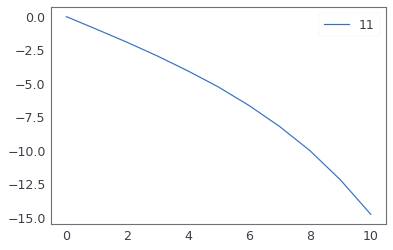

In [29]:
OOCCmc = np.array([x[-3][3] for x in OCtt])
plt.figure()
plt.plot(OOCCmc,label="%g"%i)
#plt.hlines(A,0,10)
#plt.ylim(A*.99,A*1.01)
plt.legend()
plt.show()

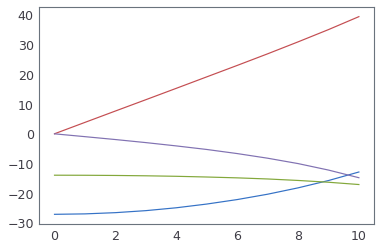

In [32]:
OOCCmc = np.array([x[-3] for x in OCtt])
plt.figure()
for l in OOCCmc.T:
    plt.plot(l)
plt.show()

In [13]:
j=10
xxvv,xv_LSR = evols_r[1][0][j],evols_r[0][j]
r_LSR = np.array(xv_LSR[:3:])
v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
cc = np.array([xv[:3:] for xv in xxvv])
vv = np.array([xv[3::] for xv in xxvv])
vvkm = vv*mt.C.kpc.express(mt.C.km)
vv_galac = np.array([oc.vcart2vgalactic(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])

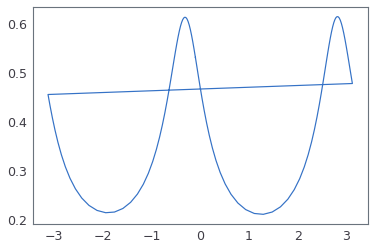

In [14]:
plt.plot(cc_galac[:,1],cc_galac[:,0])

In [15]:
OOCCmc[-1]

NameError: name 'OOCCmc' is not defined

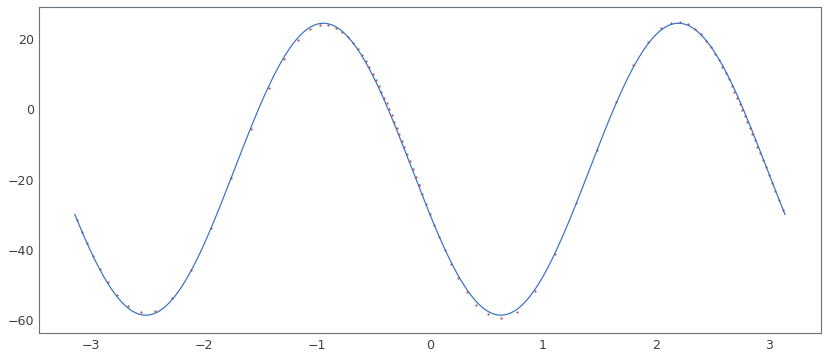

In [58]:
plt.figure(figsize=(14,6))
plt.scatter(cc_galac[:,1],vv_galac[:,1]/cc_galac[:,0],s=4,c="r")
plt.plot(np.linspace(-np.pi,np.pi,200),OOCCmc[-1][1]+OOCCmc[-1][0]*np.cos(2*np.linspace(-np.pi,np.pi,200))-OOCCmc[-1][2]*np.sin(2*np.linspace(-np.pi,np.pi,200)))
plt.show()

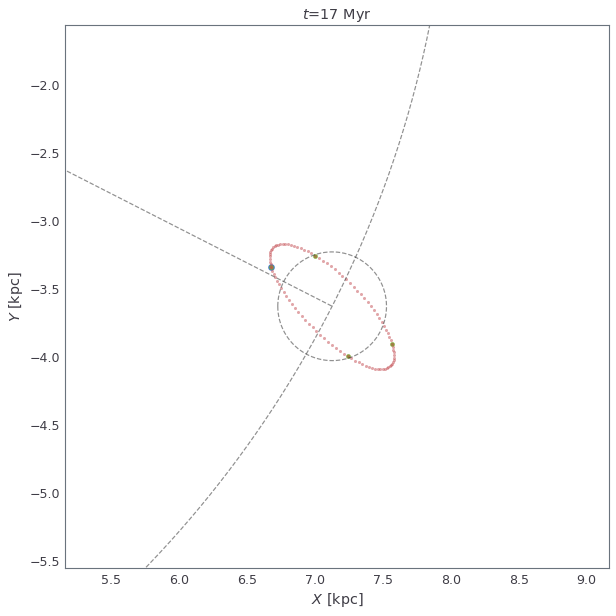

In [17]:
tc_index = 10
lsrs = np.array(evols_r[0])
Dt = 0.0199009793340327*2.65860467535e+15/60./60./24./365./1e6
rc=.4
plt.figure(figsize=(10,10))
plt.scatter(cc[0,0],cc[0,1],alpha=1,s=40)
plt.scatter(cc[0:-1:25,0],cc[0:-1:25,1],alpha=1,s=20)    
plt.scatter(cc[:,0],cc[:,1],alpha=.5,s=8)
plt.plot([0,lsrs[tc_index][0]],[0,lsrs[tc_index][1]],ls="--",c='k',alpha=.5)
plt.plot(R0*np.cos(auxtt),R0*np.sin(auxtt),ls="--",c='k',alpha=.5)
plt.plot(rc*np.cos(auxtt2)+lsrs[tc_index][0],rc*np.sin(auxtt2)+lsrs[tc_index][1],ls="--",c='k',alpha=.5)
plt.xlim(R0*np.cos(omega_0*Dt*tc_index)-5*rc,R0*np.cos(omega_0*Dt*tc_index)+5*rc)
plt.ylim(R0*np.sin(omega_0*Dt*tc_index)-5*rc,R0*np.sin(omega_0*Dt*tc_index)+5*rc)
plt.xlabel("$X$ [kpc]")
plt.ylabel("$Y$ [kpc]")
plt.title("$t$=%.2g Myr"%(tc_index*Dt))
plt.gca().set_aspect('equal')
plt.show()

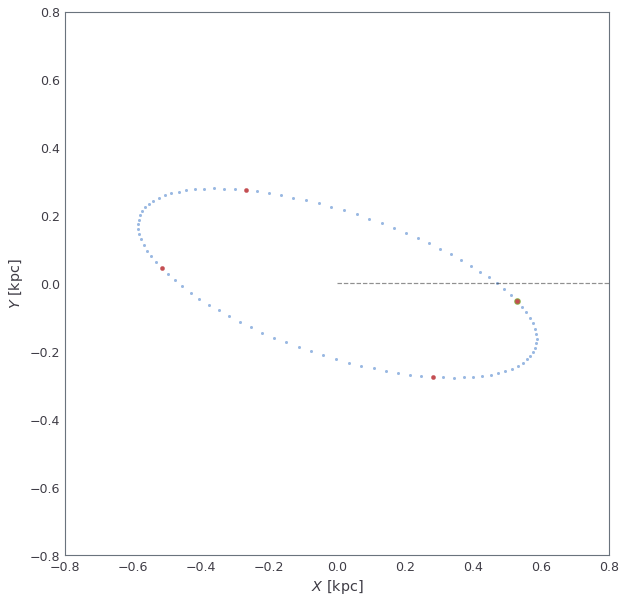

In [18]:
lsrs = np.array(evols_r[0])
rc=.4
plt.figure(figsize=(10,10))
plt.scatter(cc_galac[:,0]*np.cos(cc_galac[:,1]),cc_galac[:,0]*np.sin(cc_galac[:,1]),alpha=.5,s=8)
plt.scatter(cc_galac[0,0]*np.cos(cc_galac[0,1]),cc_galac[0,0]*np.sin(cc_galac[0,1]),alpha=1,s=40)
plt.scatter(cc_galac[0:-1:25,0]*np.cos(cc_galac[0:-1:25,1]),cc_galac[0:-1:25,0]*np.sin(cc_galac[0:-1:25,1]),alpha=1,s=20)    
plt.plot([0,10],[0,0],ls="--",c='k',alpha=.5)
plt.xlim(-2*rc,2*rc)
plt.ylim(-2*rc,2*rc)
plt.xlabel("$X$ [kpc]")
plt.ylabel("$Y$ [kpc]")
plt.gca().set_aspect('equal')
plt.show()

In [19]:
j=10
rc_index = 1
xxvv,xv_LSR = evols_r[1][rc_index][j],evols_r[rc_index][j]

r_LSR = np.array(xv_LSR[:3:])
v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)

cc = np.array([xv[:3:] for xv in xxvv])
vv = np.array([xv[3::] for xv in xxvv])
[np.linalg.norm(mt.vel_circ(c,mt.force_T)-v) for c,v in zip(cc,vv)]

[5.682660907115355e-16,
 5.587747631154176e-16,
 5.483802910896219e-16,
 5.371963190947974e-16,
 5.253498328438861e-16,
 5.129817154894144e-16,
 5.002472770053055e-16,
 4.873166537058717e-16,
 4.743749249988188e-16,
 4.616217328149089e-16,
 4.492701205750188e-16,
 4.3754424564938693e-16,
 4.266755859191836e-16,
 4.16897293955759e-16,
 4.0843649634590505e-16,
 4.01504627838701e-16,
 3.962863303073528e-16,
 3.9292796438974694e-16,
 3.915272221097229e-16,
 3.921254894419255e-16,
 3.947043346657584e-16,
 3.9918679562651764e-16,
 4.0544320903149274e-16,
 4.1330048546420026e-16,
 4.2255325539229933e-16,
 4.3297528806177945e-16,
 4.44329921896193e-16,
 4.563787474322314e-16,
 4.68888268450236e-16,
 4.816346256471749e-16,
 4.944066724480482e-16,
 5.070077689881522e-16,
 5.192566517297403e-16,
 5.309876837173088e-16,
 5.420507235074525e-16,
 5.523107864102228e-16,
 5.616476176379707e-16,
 5.699552553219602e-16,
 5.771416312320956e-16,
 5.831282363683103e-16,
 5.87849865150862e-16,
 5.9125444374

Analisis-canicas.ipynb         modelos-cinturones.ipynb
axisim_comp.py                 MTmp.py
canicas_pruebas-Copy1.ipynb    MTmp.pyc
canicas_pruebas.ipynb          MT.py
config.py                      MT.pyc
config.pyc                     ocvar2.py
density_across_time.py         ocvar.py
evolsA2.npy                    oort_cons.py
evolsA.npy                     oort_cons.pyc
evolsB2.npy                    plot__oort-cons-c1.py
evolsB.npy                     plot__rho_0-vs-r.py
evols_oc_var1_cons.npy         plot__rho_rz-vs-r.py
evols_oc_var1.npy              plot__v_circ-vs-r.py
evols_oc_var2_cons.npy         plot__v_tot-vs-r.py
evols_oc_var2.npy              pymses/
evols_r_axisim2.npy            rmate*
evols_r_axisim.npy             Tesis-figuras-Copy1.ipynb
evols_r_axisim_rp1p2p3p10.npy  Tesis-figuras.ipynb
make_marbles_mp.py             Untitled1.ipynb
make_marbles.py                Untitled.ipynb


In [27]:
evols_var2 = np.load("evols_oc_var2.npy")
evols_var2_cons = np.load("evols_oc_var2_cons.npy")

In [56]:
auxtt2 = np.linspace(-np.pi,np.pi,200)

In [81]:
varAB = [[evols_var2[1][i*9+j] for i in range(9)] for j in range(9)]
varAB_cons = [[evols_var2_cons[i*9+j] for i in range(9)] for j in range(9)]

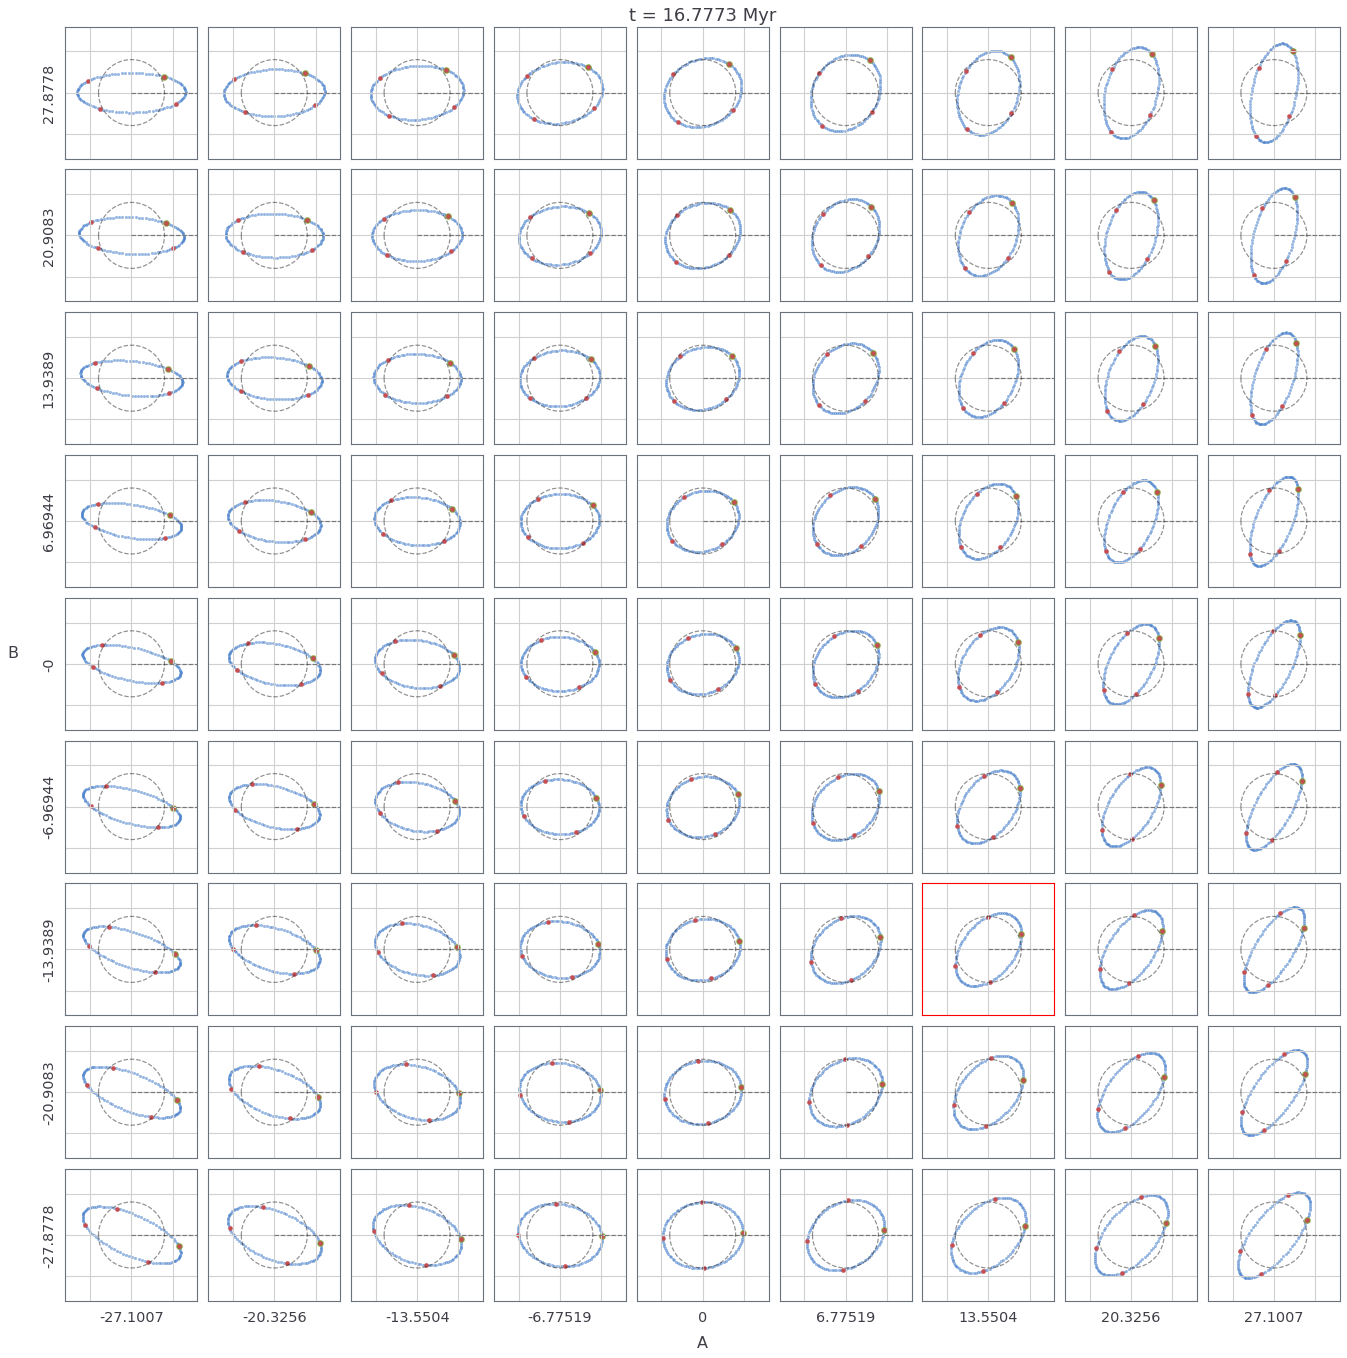

In [110]:
tc_index = 10
rc=.4
fig, axes = plt.subplots(9, 9,figsize=(18,18))
for i in range(len(axes)):
    for j in range(len(axes)):
        xxvv,xv_LSR = varAB[j][i][tc_index],evols_var2[0][tc_index]
        r_LSR = np.array(xv_LSR[:3:])
        v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
        cc = np.array([xv[:3:] for xv in xxvv])
        vv = np.array([xv[3::] for xv in xxvv])
        vvkm = vv*mt.C.kpc.express(mt.C.km)
        vv_galac = np.array([oc.vcart2vgalactic(cc[k],r_LSR,vvkm[k],v_LSR) for k in range(len(vvkm))])
        cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
        axes[j][i].scatter(cc_galac[:,0]*np.cos(cc_galac[:,1]),cc_galac[:,0]*np.sin(cc_galac[:,1]),alpha=.5,s=8)
        axes[j][i].scatter(cc_galac[0,0]*np.cos(cc_galac[0,1]),cc_galac[0,0]*np.sin(cc_galac[0,1]),alpha=1,s=40)
        axes[j][i].scatter(cc_galac[0:-1:25,0]*np.cos(cc_galac[0:-1:25,1]),cc_galac[0:-1:25,0]*np.sin(cc_galac[0:-1:25,1]),alpha=1,s=20)    
        axes[j][i].plot([0,10],[0,0],ls="--",c='k',alpha=.5)
        axes[j][i].plot(rc*np.cos(auxtt2),rc*np.sin(auxtt2),ls="--",c='k',alpha=.5)
        axes[j][i].set_xlim(-2*rc,2*rc)
        axes[j][i].set_ylim(-2*rc,2*rc)
        #axes[j][i].get_yaxis().set_visible(False)
        #axes[j][i].get_xaxis().set_visible(False)
        axes[j][i].xaxis.set_ticklabels([])
        axes[j][i].yaxis.set_ticklabels([])
        axes[j][i].minorticks_on()
        axes[j][i].grid(True)
axes[6][6].spines["bottom"].set_color("red")
axes[6][6].spines["left"].set_color("red")
axes[6][6].spines["top"].set_color("red")
axes[6][6].spines["right"].set_color("red")
fig.tight_layout()
for i in range(9):
    axes[8][i].set_xlabel("%g"%varAB_cons[8][i][0])
for j in range(9):
    axes[j][0].set_ylabel("%g"%varAB_cons[j][0][1])
axes[8][4].set_title("A",y=-.4,fontsize=16)
axes[4][0].set_title("B",x=-.4,y=.5,fontsize=16)
axes[0][4].set_title("t = %g Myr"%(Dt*10),fontsize=18)
fig.show()
#fig.savefig('AvsB.pdf')

In [111]:
fig.savefig('AvsB_t10.pdf')

In [124]:
varAB = [[evols_var2[1][81+i*9+j] for i in range(9)] for j in range(9)]
varAB_cons = [[evols_var2_cons[81+i*9+j] for i in range(9)] for j in range(9)]

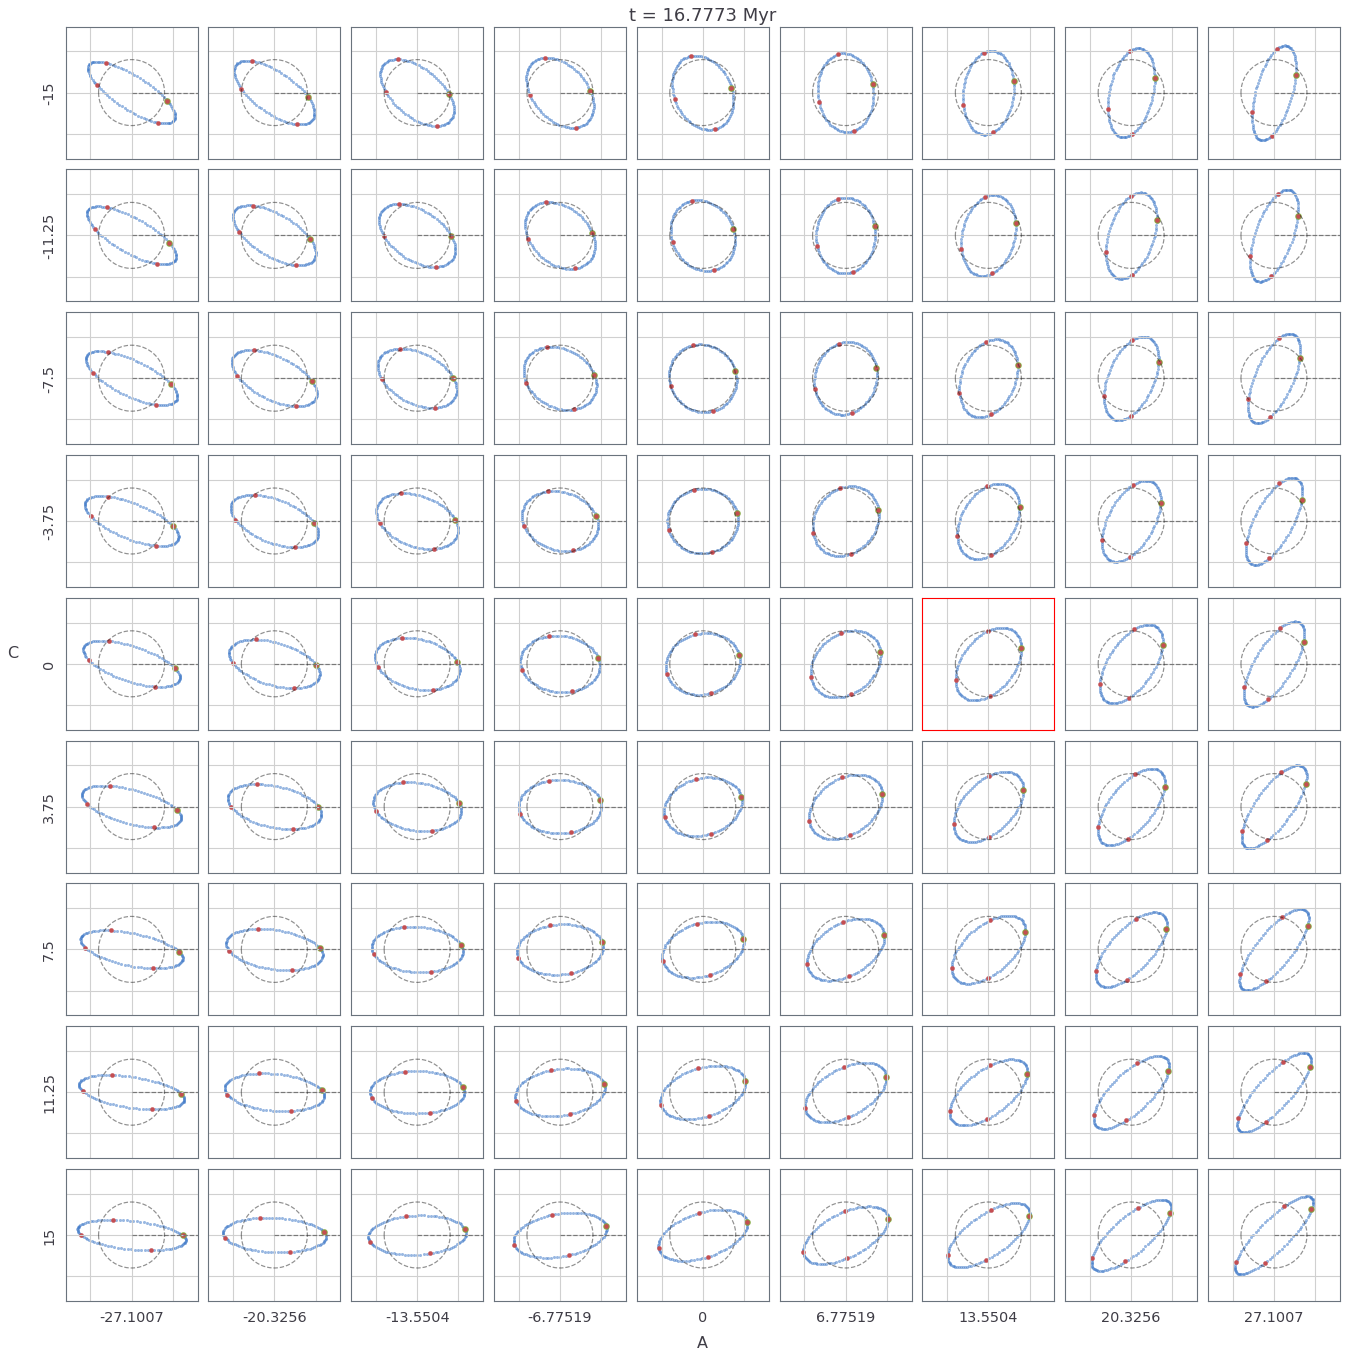

In [125]:
tc_index = 10
rc=.4
fig, axes = plt.subplots(9, 9,figsize=(18,18))
for i in range(len(axes)):
    for j in range(len(axes)):
        xxvv,xv_LSR = varAB[j][i][tc_index],evols_var2[0][tc_index]
        r_LSR = np.array(xv_LSR[:3:])
        v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
        cc = np.array([xv[:3:] for xv in xxvv])
        vv = np.array([xv[3::] for xv in xxvv])
        vvkm = vv*mt.C.kpc.express(mt.C.km)
        vv_galac = np.array([oc.vcart2vgalactic(cc[k],r_LSR,vvkm[k],v_LSR) for k in range(len(vvkm))])
        cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
        axes[j][i].scatter(cc_galac[:,0]*np.cos(cc_galac[:,1]),cc_galac[:,0]*np.sin(cc_galac[:,1]),alpha=.5,s=8)
        axes[j][i].scatter(cc_galac[0,0]*np.cos(cc_galac[0,1]),cc_galac[0,0]*np.sin(cc_galac[0,1]),alpha=1,s=40)
        axes[j][i].scatter(cc_galac[0:-1:25,0]*np.cos(cc_galac[0:-1:25,1]),cc_galac[0:-1:25,0]*np.sin(cc_galac[0:-1:25,1]),alpha=1,s=20)    
        axes[j][i].plot([0,10],[0,0],ls="--",c='k',alpha=.5)
        axes[j][i].plot(rc*np.cos(auxtt2),rc*np.sin(auxtt2),ls="--",c='k',alpha=.5)
        axes[j][i].set_xlim(-2*rc,2*rc)
        axes[j][i].set_ylim(-2*rc,2*rc)
        #axes[j][i].get_yaxis().set_visible(False)
        #axes[j][i].get_xaxis().set_visible(False)
        axes[j][i].xaxis.set_ticklabels([])
        axes[j][i].yaxis.set_ticklabels([])
        axes[j][i].minorticks_on()
        axes[j][i].grid(True)
axes[4][6].spines["bottom"].set_color("red")
axes[4][6].spines["left"].set_color("red")
axes[4][6].spines["top"].set_color("red")
axes[4][6].spines["right"].set_color("red")
fig.tight_layout()
for i in range(9):
    axes[8][i].set_xlabel("%g"%varAB_cons[8][i][0])
for j in range(9):
    axes[j][0].set_ylabel("%g"%varAB_cons[j][0][2])
axes[8][4].set_title("A",y=-.4,fontsize=16)
axes[4][0].set_title("C",x=-.4,y=.5,fontsize=16)
axes[0][4].set_title("t = %g Myr"%(Dt*10),fontsize=18)
fig.show()
#fig.savefig('AvsB.pdf')

In [126]:
fig.savefig('AvsC_t10.pdf')

In [121]:
varAB = [[evols_var2[1][81*2+i*9+j] for i in range(9)] for j in range(9)]
varAB_cons = [[evols_var2_cons[81*2+i*9+j] for i in range(9)] for j in range(9)]

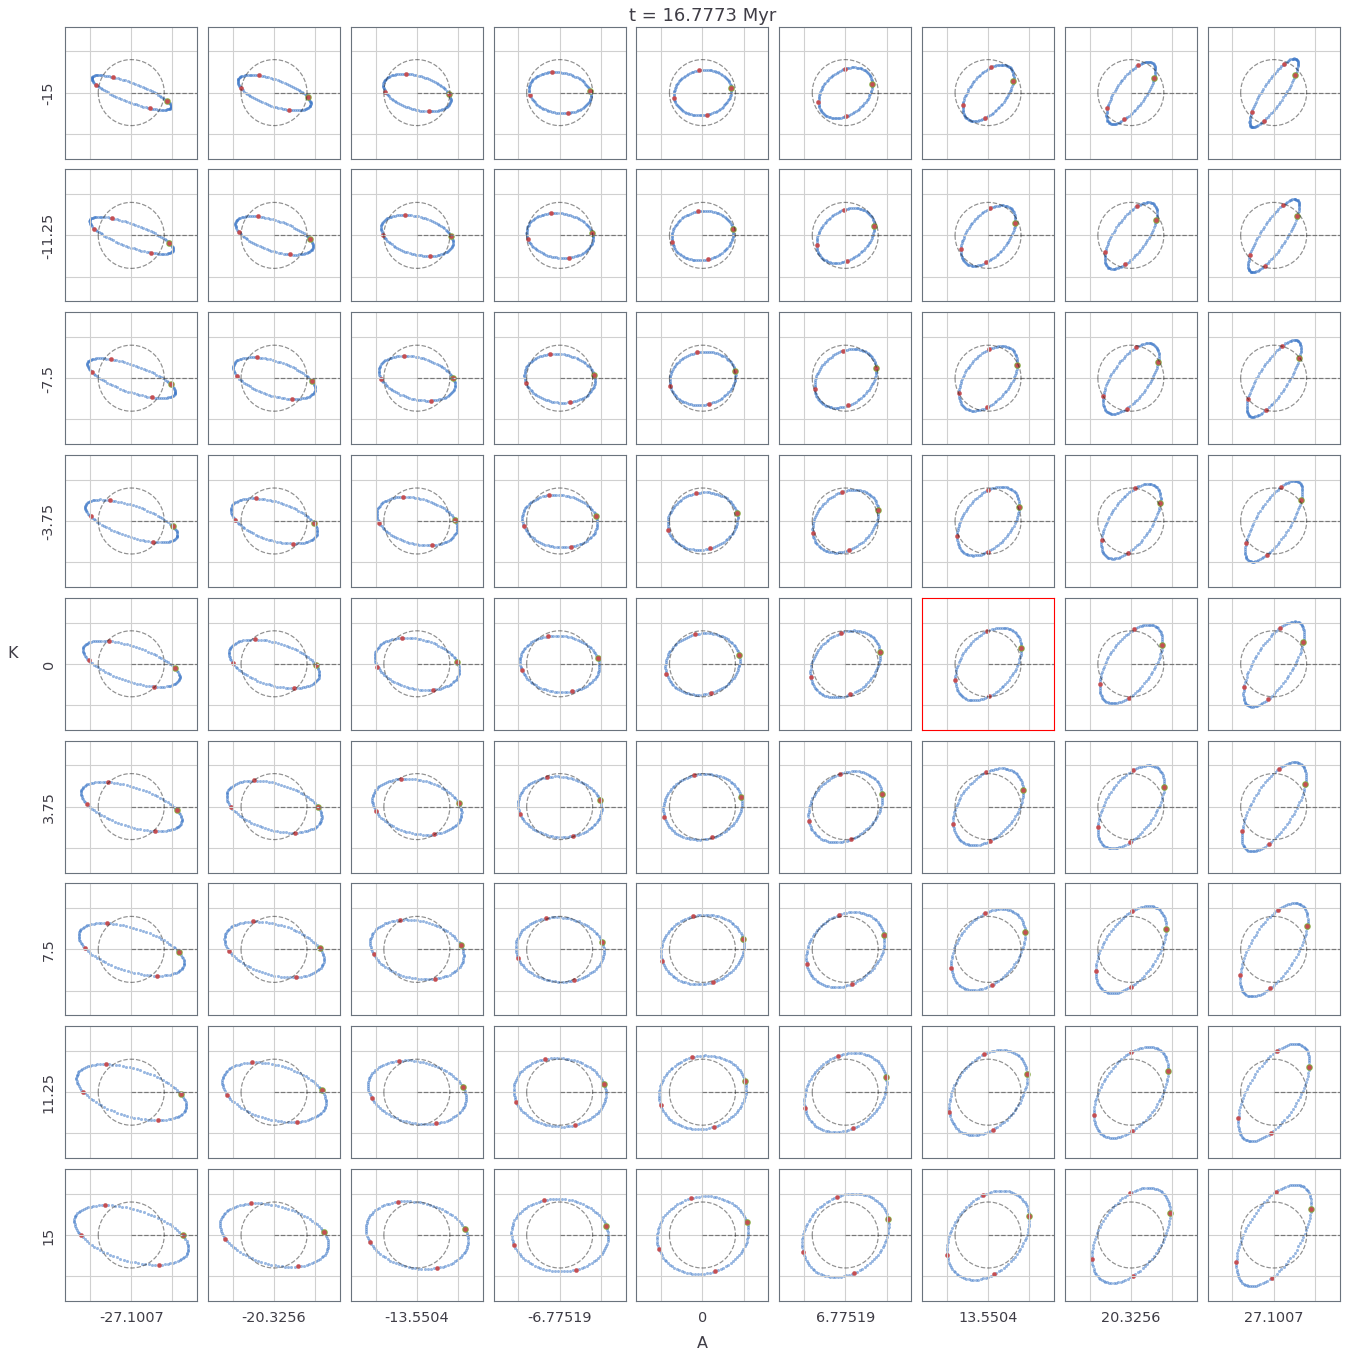

In [122]:
tc_index = 10
rc=.4
fig, axes = plt.subplots(9, 9,figsize=(18,18))
for i in range(len(axes)):
    for j in range(len(axes)):
        xxvv,xv_LSR = varAB[j][i][tc_index],evols_var2[0][tc_index]
        r_LSR = np.array(xv_LSR[:3:])
        v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
        cc = np.array([xv[:3:] for xv in xxvv])
        vv = np.array([xv[3::] for xv in xxvv])
        vvkm = vv*mt.C.kpc.express(mt.C.km)
        vv_galac = np.array([oc.vcart2vgalactic(cc[k],r_LSR,vvkm[k],v_LSR) for k in range(len(vvkm))])
        cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
        axes[j][i].scatter(cc_galac[:,0]*np.cos(cc_galac[:,1]),cc_galac[:,0]*np.sin(cc_galac[:,1]),alpha=.5,s=8)
        axes[j][i].scatter(cc_galac[0,0]*np.cos(cc_galac[0,1]),cc_galac[0,0]*np.sin(cc_galac[0,1]),alpha=1,s=40)
        axes[j][i].scatter(cc_galac[0:-1:25,0]*np.cos(cc_galac[0:-1:25,1]),cc_galac[0:-1:25,0]*np.sin(cc_galac[0:-1:25,1]),alpha=1,s=20)    
        axes[j][i].plot([0,10],[0,0],ls="--",c='k',alpha=.5)
        axes[j][i].plot(rc*np.cos(auxtt2),rc*np.sin(auxtt2),ls="--",c='k',alpha=.5)
        axes[j][i].set_xlim(-2*rc,2*rc)
        axes[j][i].set_ylim(-2*rc,2*rc)
        #axes[j][i].get_yaxis().set_visible(False)
        #axes[j][i].get_xaxis().set_visible(False)
        axes[j][i].xaxis.set_ticklabels([])
        axes[j][i].yaxis.set_ticklabels([])
        axes[j][i].minorticks_on()
        axes[j][i].grid(True)
axes[4][6].spines["bottom"].set_color("red")
axes[4][6].spines["left"].set_color("red")
axes[4][6].spines["top"].set_color("red")
axes[4][6].spines["right"].set_color("red")
fig.tight_layout()
for i in range(9):
    axes[8][i].set_xlabel("%g"%varAB_cons[8][i][0])
for j in range(9):
    axes[j][0].set_ylabel("%g"%varAB_cons[j][0][3])
axes[8][4].set_title("A",y=-.4,fontsize=16)
axes[4][0].set_title("K",x=-.4,y=.5,fontsize=16)
axes[0][4].set_title("t = %g Myr"%(Dt*10),fontsize=18)
fig.show()
#fig.savefig('AvsB.pdf')

In [123]:
fig.savefig('AvsK_t10.pdf')